# Background and Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.


# Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# Data Dictionary
* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report, roc_auc_score, roc_curve

# Import Data

In [2]:
bank = pd.read_csv("bank.csv")

In [3]:
df = bank.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

- The dataset consists of 10000 rows and 14 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- `Surname`, `Geography` and `Gender` are objects. Others are numbers.

## Check missing values

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- No missing values.

## Check duplicates

In [8]:
any(df.duplicated())

False

- No duplicate rows.

## Check unique values

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- It seems `RowNumber` and `CustomerId` and are not releveant features, as we have distinct `RowNumber` and `CustomerId` for each customer.
- By common sense, we know `Surname` should not correlate with churn rate.

### Drop `RowNumber`, `CustomerId`, `Surname`

In [10]:
df = df.drop(columns = ["RowNumber", "CustomerId", "Surname"])

## Data Summary

In [27]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


- The ranges of features vary from 0 to 250000. We will need to do scale transformation before model building. 

# Univariate Analysis

In [13]:
def hist_box_plot(col):
    plt.figure(figsize = (15,5));
    plt.subplot(121);
    sns.histplot(x = col, data = df, kde = True);
    plt.subplot(122);
    sns.boxplot(x = col, data = df, showmeans = True, color = "yellow");

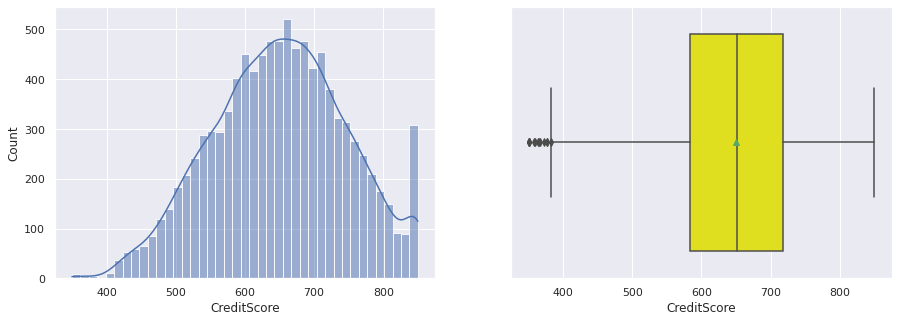

In [14]:
hist_box_plot("CreditScore")

- `CreditScore` approaches normal distribution and ranges from 350 to 850, with almost equal mean and median. A few outliers on the left.

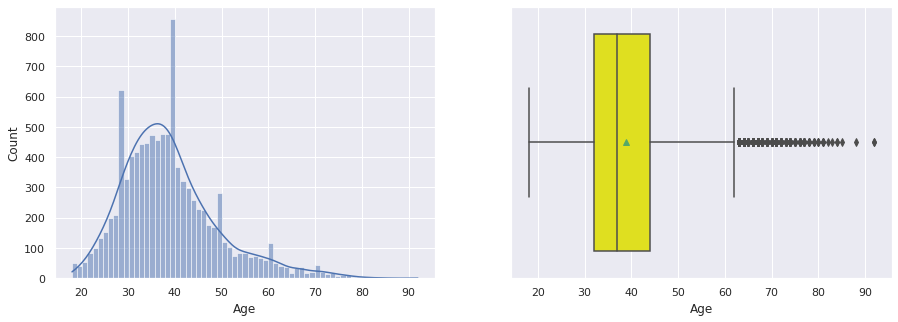

In [15]:
hist_box_plot("Age")

- `Age` is right-skewed and varies from 18 to 90+. About 50% are under 35 years old. A number of outliers on the right.

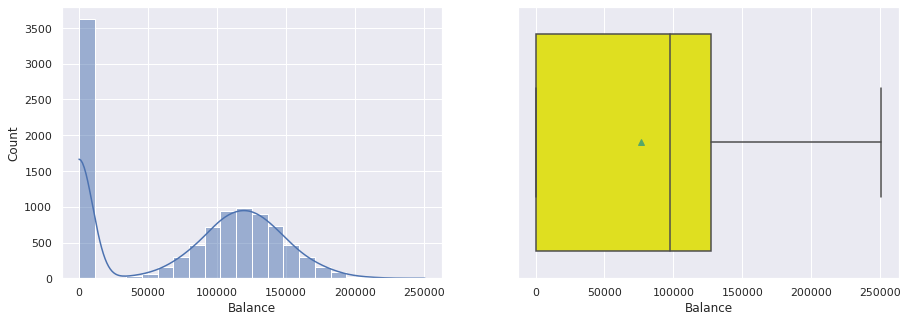

In [16]:
hist_box_plot("Balance")

- At least 25% of the customers are with zero account balance. The remainings approaches normal distribution.

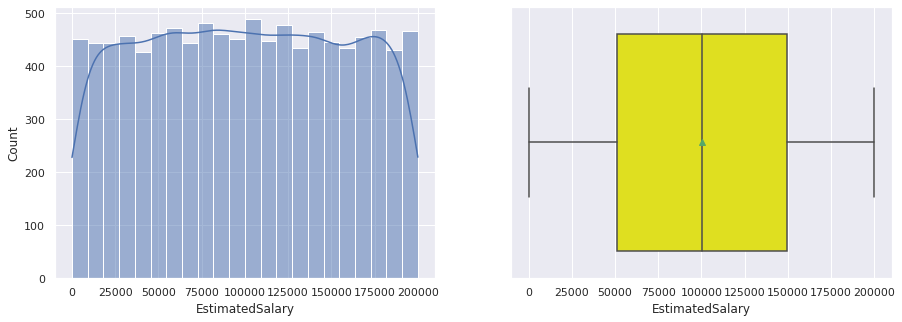

In [17]:
hist_box_plot("EstimatedSalary")

- `EstimatedSalary` is evenly distributed with equal mean and median.

In [18]:
def countplot(col, figsize):
    plt.figure(figsize = figsize)
    ax = sns.countplot(x = col, data = df);
    for p in ax.patches:
        x, y = p.get_x(), p.get_y()
        h, w = p.get_height(), p.get_width()
        percent = np.round(h / df.shape[0] * 100, 2)
        plt.annotate(xy = (x + w/2 - 0.3, y + h), text = str(percent) + "%")

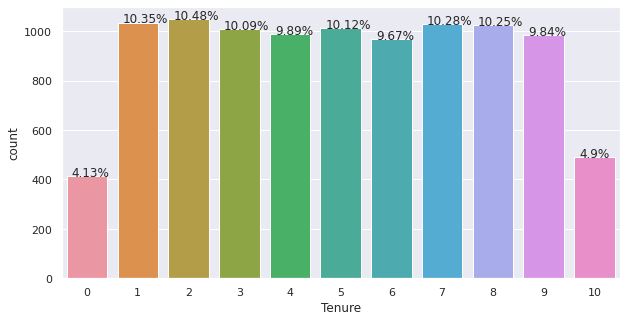

In [19]:
countplot("Tenure", figsize = (10,5))

- Most customers has been with our bank for 1 - 9 years, and they evenly distribute.
- 4% of customers are new customers with less than 1 year of relationship.
- 5% of customers are loyal customers with 10 years of relationship.

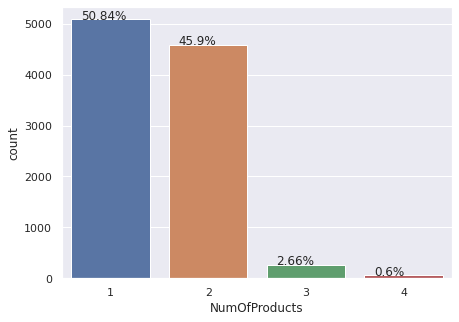

In [20]:
countplot("NumOfProducts", figsize = (7,5))

- 50.8% of customers bought 1 product and 46% of customers bought 2 products.
- 3% of customers bought more than two products.

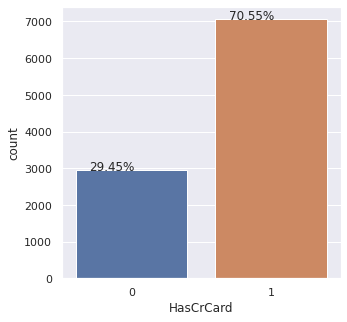

In [21]:
countplot("HasCrCard", figsize = (5,5))

- More than 70% of the customers have credit cards.

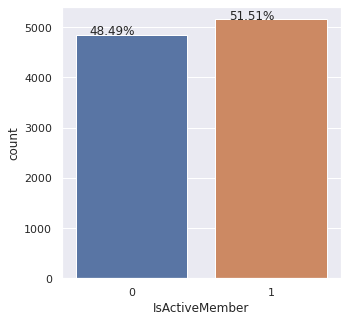

In [22]:
countplot("IsActiveMember", figsize = (5,5))

- About half of customers are active members.

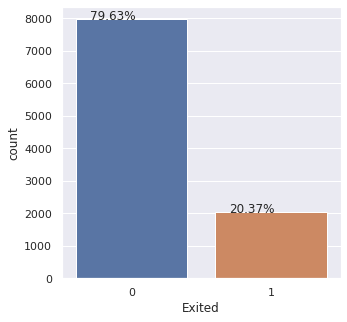

In [23]:
countplot("Exited", figsize = (5,5))

- About 20% churn rate.

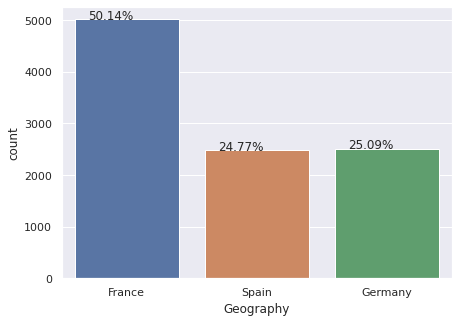

In [24]:
countplot("Geography", figsize = (7,5))

- Half of the customers come from France. The remainings are evenly distributed in Spain and Germany.

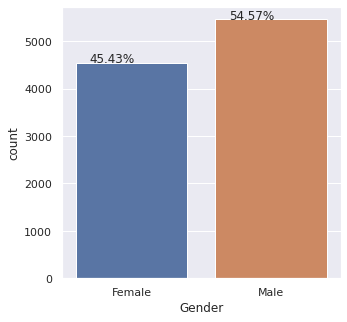

In [25]:
countplot("Gender", figsize = (5,5))

More male than female, with 56% of the total are male.

# Bivariate Analysis

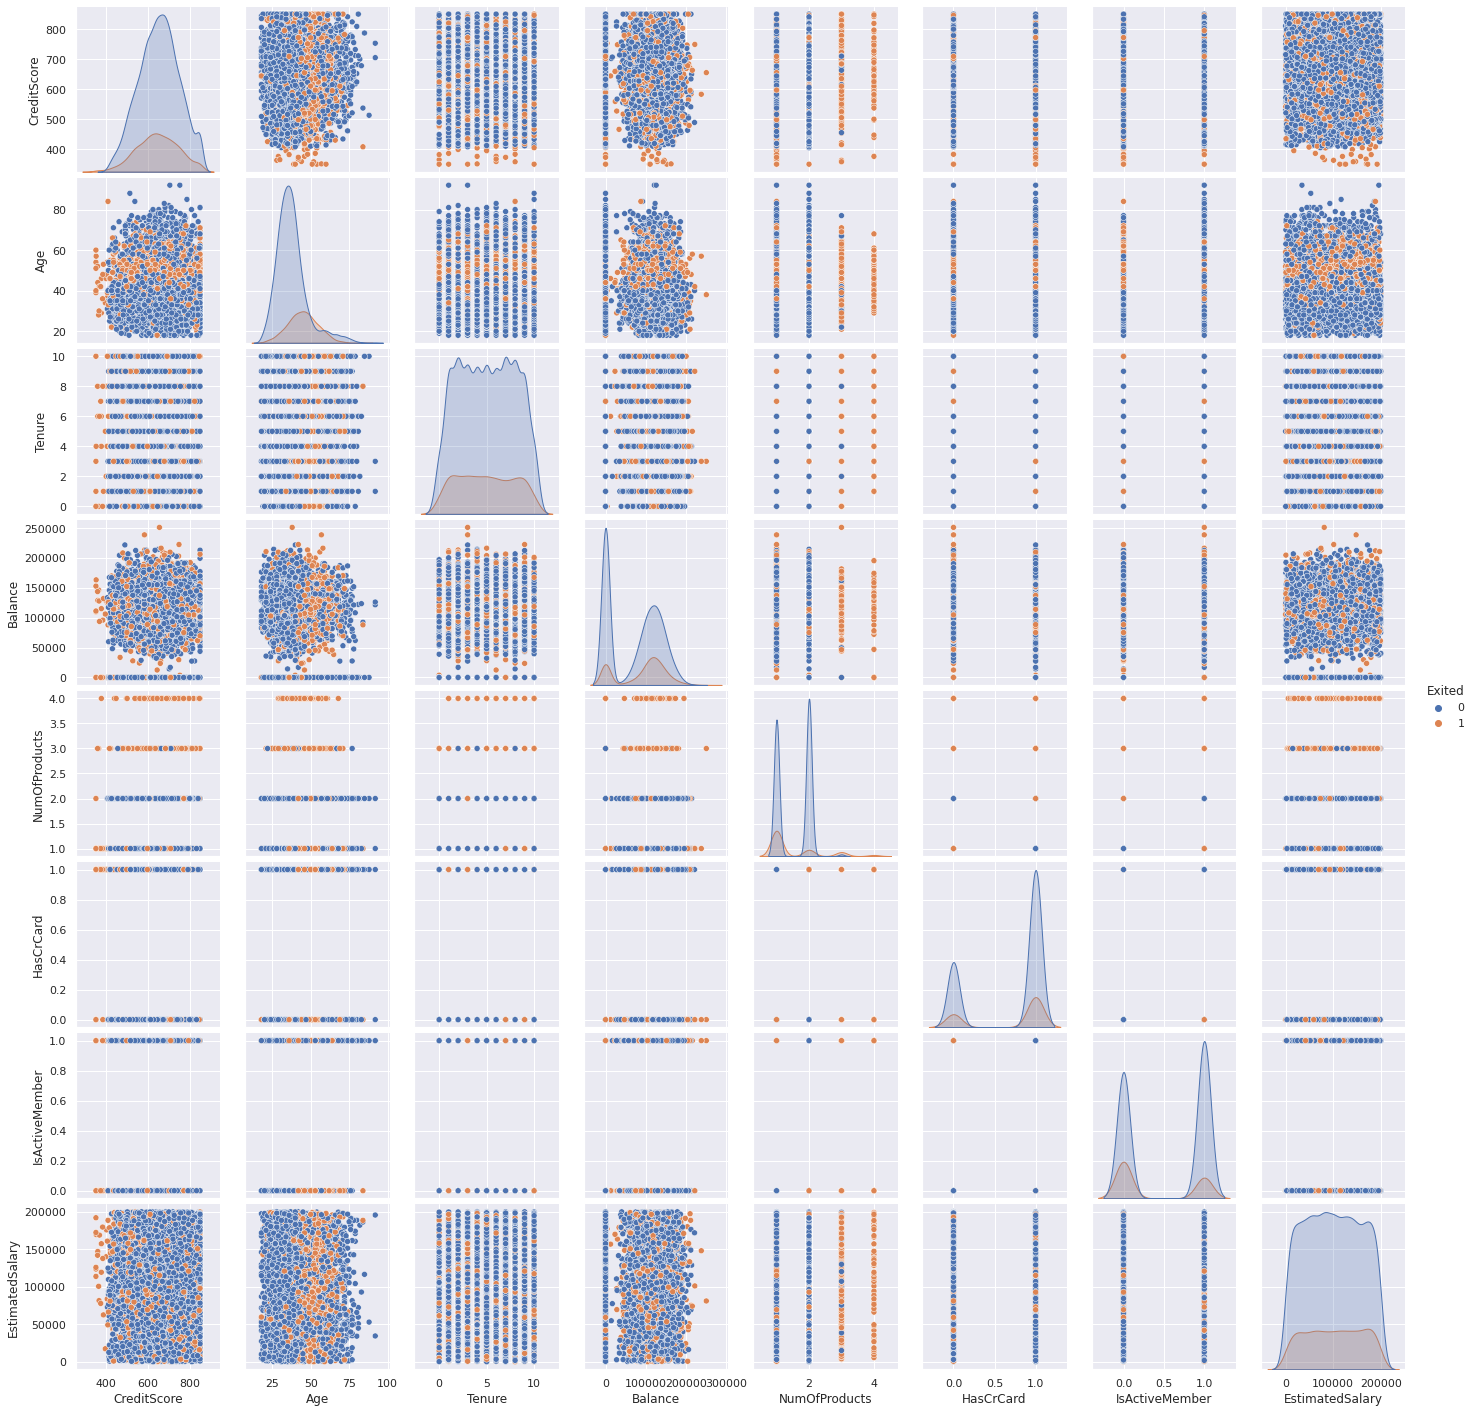

In [28]:
sns.pairplot(data = df, diag_kind = "kde", hue = "Exited");

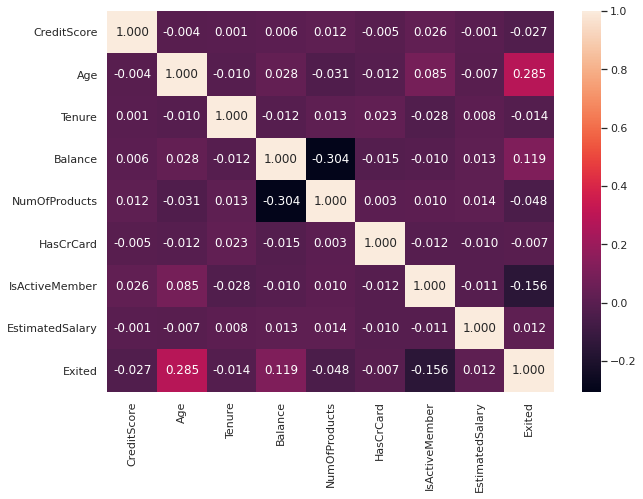

In [33]:
plt.figure(figsize = (10,7));
sns.heatmap(data = df.corr(), fmt = ".3f", annot = True);

- No significant correlation exists between features.